# Programmieraufgaben zu 2.3 (Support Vector Machine)

---

## Programmieraufgabe 1

Sei ein Datensatz $D$ gegeben durch

$$
D=\{((2, 7), -1), ((7.5, 0.5), -1), ((3, 3.3), -1), ((2.5, 7.5), 1), ((4, 3.8), 1), ((5, 2), 1)\}
$$

**Aufgabe**: Bestimmen Sie, unter Nutzung von Python und scikit-learn, die optimale lineare soft-margin SVM bzgl. $D$.

In [26]:
from sklearn.svm import SVC

D = [
    ((2, 7), -1),
    ((7.5, 0.5), -1),
    ((3, 3.3), -1),
    ((2.5, 7.5), 1),
    ((4, 3.8), 1),
    ((5, 2), 1),
]

x_vals = [d[0] for d in D]
y_hats = [d[1] for d in D]

clf = SVC(kernel="linear").fit(x_vals, y_hats)

bias = -clf.intercept_[0]
theta_1 = clf.coef_[0][0]
theta_2 = clf.coef_[0][1]

print(f"Wir erhalten: h_opt = ({theta_1:0.3f}, {theta_2:0.3f})^Tx - {bias:0.3f}")

Wir erhalten: h_opt = (0.320, 0.515)^Tx - 3.659


---

## Programmieraufgabe 2

Seien ein Trainingsdatensatz $D^\text{train}$

$$
D^\text{train}=\{((8.7, 16.5), 1), ((10.8, 14.8), 1), ((12, 16.7), 1), ((12.2, 12.2), 1), ((16.5, 13), −1), ((5.8, 23.5), −1)\}
$$

und ein Testdatensatz $D^\text{test}$

$$
D^\text{test}=\{((13, 12.5), 1), ((6.2, 21.3), −1), ((6, 25.8), 1), ((8.5, 27.7), −1)\}
$$

gegeben. 

Die folgenden Aufgaben sollen unter Nutzung von Python und scikit-learn durchgeführt werden.

**Aufgaben**:


1. Plotten Sie den Datensatz $D^\text{train}$.
2. Bestimmen Sie anhand des Plots aus dem vorherigen Schritt eine geeignete Kernel-Funktion.
3. Bestimmen Sie die Supportvektoren der optimale soft-margin SVM bzgl. $D^\text{train}$.
4. Berechnen Sie die folgenden Maße bzgl. $D^\text{test}$ und der zuvor trainierten SVM:
    - Genauigkeit
    - Präzision
    - Sensitivität
    - F1


[(8.7, 16.5), (10.8, 14.8), (12, 16.7), (12.2, 12.2), (16.5, 13), (5.8, 23.5)]

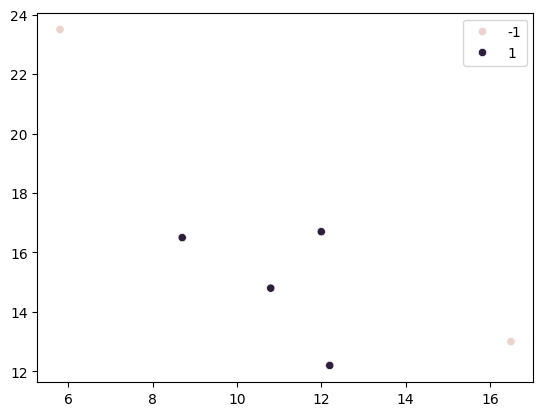

In [62]:
from seaborn import scatterplot

d_train = [
    ((8.7, 16.5), 1),
    ((10.8, 14.8), 1),
    ((12, 16.7), 1),
    ((12.2, 12.2), 1),
    ((16.5, 13), -1),
    ((5.8, 23.5), -1),
]

x_train = [d[0] for d in d_train]
y_hats = [d[1] for d in d_train]

x, y = zip(*x_train)

scatterplot(x=x, y=y, hue=y_hats)
x_train

Aufgrund der kreisförmigen Anordnung der Klasse "1" bietet sich für das Training der SVM die Nutzung eines RBF-Kernels an.

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

clf = SVC(kernel="rbf").fit(x_train, y_hats)
print("Support Vectors:\n", clf.support_vectors_)

D_test = [((13, 12.5), 1), ((6.2, 21.3), -1), ((6, 25.8), 1), ((8.5, 27.7), -1)]
x_test = [d[0] for d in D_test]
y_hats_test = [d[1] for d in D_test]

pred = clf.predict(x_test)
print()
print("--- Metrics ---")
print(f"Genauigkeit: {accuracy_score(pred, y_hats_test)}")
print(f"Precision: {precision_score(pred, y_hats_test)}")
print(f"Recall: {recall_score(pred, y_hats_test)}")
print(f"F1: {f1_score(pred, y_hats_test)}")

Support Vectors:
 [[16.5 13. ]
 [ 5.8 23.5]
 [ 8.7 16.5]
 [12.  16.7]
 [12.2 12.2]]

--- Metrics ---
Genauigkeit: 0.75
Precision: 0.5
Recall: 1.0
F1: 0.6666666666666666
